In [1]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [2]:
data = json.loads(open('/content/etnews.kr_facebook_2016-01-01_2018-08-01_4차_산업혁명.json', 'r', encoding = 'utf8').read())

In [3]:
message = ''
for item in data: 
    if 'message' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['message']) +''

In [4]:
nlp = Okt()
message_N = nlp.nouns(message)

In [5]:
count = Counter(message_N)

In [6]:
word_count = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts

In [9]:
font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"

In [10]:
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)


In [7]:
plt.rcParams['font.family'] = 'NanumBarunGothic'

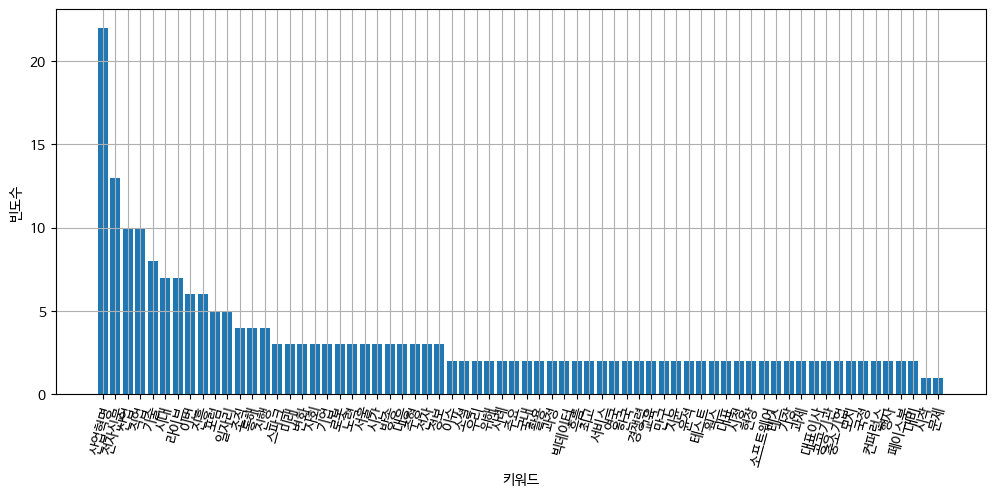

In [11]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

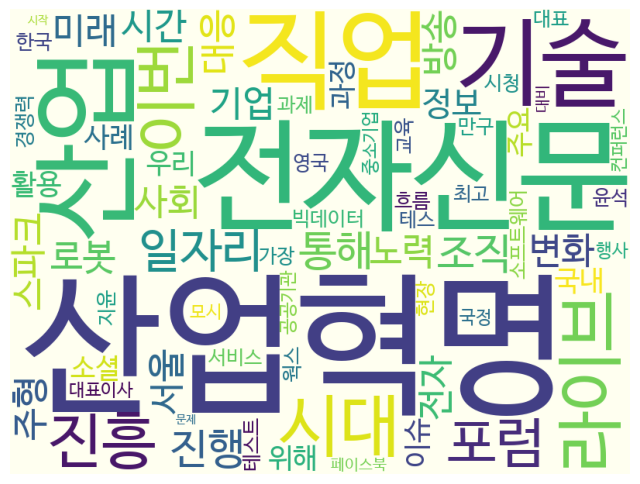

In [12]:

wc = WordCloud(background_color = 'ivory', width = 800,\
               height = 600,font_path=font_path)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show() 

In [14]:
cloud.to_file("곽도성" + '_cloud.jpg')